In [1]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
import collections
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
nltk.download('rslp')
from nltk.stem import RSLPStemmer

In [3]:
data = pd.read_csv('https://github.com/dnrocha1/information_retrieval/blob/master/data/results.csv?raw=true')

# Questão 1
## Estratégia de tokenização

Diferente do laboratório anterior, a estratégia de tonekização escolhida não considerou todas as palavras contendo caractéres alfanuméricos. O método utilizado para a criação dos tokens é composto de duas etapas. Inicialmente, a coleção de palavras é tokenizada com o auxílio de uma expressão regular que filtra os mesmos caractéres alfanuméricos de antes, mas agora descarta palavras com tamanho menor que três e inclui termos que possuam hífen e apóstrofo. Essa opção foi feita de modo a incorporar palavras antes separadas, como *sexta-feira*, e nomes próprios como *McDonald's*, por exemplo. E a opção por excluir palavras menores que três é feita por conta de existir muitas palavras com esse tamanho que apresentam alta frequência - e isso pode fazer com que as palavras com mais frequência se adequem melhor à Lei de Zipf.

In [4]:
# pre processamento e tokenizacao de todas as palavras dos textos

texts = ''.join(data.text).lower()
regex = RegexpTokenizer(r'\b[A-zÀ-ú-\'\d]{3,}')
tokens = regex.tokenize(texts)

Também é possível observar que existe certa quantidade de palavras que apresentam um colchete (`]`) ao final do token gerado. Para que isso não ocorra, esses tokens foram corrigidos para que se adequem aos demais e aumentando a coleção de tokens.

In [29]:
# remocao de colchetes ao final de palavras

from string import punctuation
list(punctuation)
# print([s for s in tokens for x in list(punctuation) if x in s and x != '-' and x != "'"])

tokens = list(map(lambda x: x.replace("]",""), tokens))

Além disso, a transformação de caractéres maiúsculos em minúsculos é uma estratégia importante que foi aplicada no exercício anterior e também é utilizada agora. Isso permite que palavras escritas dessas duas formas possam ser classificadas como somente uma, contribuíndo para que o conjunto de palavras seja mais claro.

# Questão 2
## Top 50 palavras mais frequentes

A questão pede que a tabela considerando as 50 palavras mais frequentes na coleção seja construída. Nesse caso, ela será gerada com base nos tokens produzidos com a nova estratégia de tokenização. Além da frequência, será exibido o ranking (`r`), a probabilidade de ocorrência da palavra (`Pr(%)`) e um cálculo resultante da Lei de Zipf, descrito por `r.Pr`.

In [6]:
# frequencia de tokens e contagem dos tokens

tokens_freq = collections.Counter(tokens)
total_word_occurrences = len(tokens)

In [7]:
# construcao da tabela com estatisticas necessarias

r = 1
words, frequencies, rankings, probs, rprobs = [], [], [], [], []
for k,v in tokens_freq.most_common():
    prob = (v/total_word_occurrences)*100
    words.append(k)
    frequencies.append(v)
    rankings.append(r)
    probs.append(prob)
    rprobs.append(r*prob/100)
    r += 1
    
words_statistics = pd.DataFrame()
words_statistics['Word'] = words
words_statistics['Freq'] = frequencies
words_statistics['r'] = rankings
words_statistics['Pr(%)'] = probs
words_statistics['r.Pr'] = rprobs

In [8]:
words_statistics.head(50)

,Word,Freq,r,Pr(%),r.Pr
0,que,6554,1,4.223129,0.042231
1,para,2323,2,1.496846,0.029937
2,uma,2224,3,1.433054,0.042992
3,com,2200,4,1.417590,0.056704
4,não,2049,5,1.320292,0.066015
5,por,1350,6,0.869885,0.052193
6,como,1329,7,0.856353,0.059945
7,mais,1206,8,0.777097,0.062168
8,dos,1062,9,0.684309,0.061588
9,mas,968,10,0.623739,0.062374


# Questão 3
## Stemming nos tokens

O stemming foi aplicado nos tokens produzidos e o resultado disso foi armazenado em uma lista de radicais (`rad_list`). O stemmer utilizado foi o RSLP, que é adequado a língua portuguesa. Para facilitar a visualização dos falsos positivos e negativos, uma estrutura similar a uma tabela hash foi construída: a chave vai conter os radicais produzidos, enquanto o valor será composto por uma lista com a(s) palavra(s) originais daquele radical.

Trataremos *falsos positivos* como sendo duas palavras que foram reduzidas para um mesmo radical, mas isso não deveria acontecer. Já os *falsos negativos* serão consideradas as palavras que teriam que ser sintetizadas para um mesmo radical e foram reduzidas para radicais diferentes.

In [9]:
# tabela hash: chave (radical) e valor (lista de palavras originais)

rad_list = []

stemmer = RSLPStemmer()

hashtable = {}
for token in tokens:
    reduced = stemmer.stem(token)
    rad_list.append(reduced)
    if reduced in hashtable.keys():
        if token not in hashtable[reduced]:
            hashtable[reduced].append(token)
    else:
        hashtable[reduced] = [token]

Para encontrar os falsos positivos, a estratégia adotada foi verificar os radicais que possuem mais palavras associadas, o que talvez indique uma maior chance de existir um falso positivo. Isso é feito abaixo, selecionando os 20 radicais com mais palavras relacionadas.

In [24]:
%%capture
# verifica falsos positivos

BOLD = '\033[1m'
END = '\033[0m'

for x in sorted(hashtable, key=lambda k: len(hashtable[k]), reverse=True)[:20]:
    if len(hashtable[x]) > 1:
        print(f'{BOLD}{x}{END}: {hashtable[x]}\n')

### Exemplos de falsos positivos encontrados:

- **est**: ['estado', 'esteira']

- **pass**: ['passado', 'passagens']

- **sent**: ['sentiu', 'sentar']

- **cont**: ['conta', 'contentes']

- **pens**: ['penso', 'pensão']

- **tom**: ['tomaram', 'tomás']

- **fal**: ['fala', 'falência']

- **torn**: ['torno', 'torneiras']

- **entr**: ['entrou', 'entrada']

- **lev**: ['levava', 'levi']

In [20]:
%%capture
# verifica falsos negativos

for x in sorted(hashtable)[-1000:]:
    if len(hashtable[x]) > 1:
        print(f'{BOLD}{x}{END}: {hashtable[x]}\n')

### Exemplos de falsos negativos encontrados:

- **óbv**: ['óbvia', 'óbvias'] e **óbvi**: ['óbvio', 'óbvios']
- **vulner**: ['vulnerabilidade', 'vulnerabilidades'] e **vulnerável**: ['vulneráveis', 'vulnerável']
- **viv**: ['vivido', 'vivo', 'vive', 'viver', 'vivem', 'vivos', 'viveu', 'vivemos', 'vivia', 'viva', 'vivas', 'vividos', 'vivendo', 'vividas', 'vivida', 'viverão', 'viverá', 'vivências', 'viveram', 'vivi', 'viverem'] e **vivenci**: ['vivenciando', 'vivenciaram']
- **vig**: ['vigor', 'vigia', 'vigiam', 'vigência', 'vigora', 'viga'] e **vigi**: ['vigiado', 'vigiar', 'vigiando']
- **verd**: ['verdadeiros', 'verdadeira', 'verdadeiro', 'verde', 'verdes'] e **verdad**: ['verdades', 'verdade']
- **valor**: ['valorização', 'valorizados', 'valorizar'] e **valoriz**: ['valorizou', 'valorizam']
- **utiliz**: ['utilizar', 'utilizados', 'utilizou', 'utilização', 'utilizam', 'utilizando', 'utiliza', 'utilizadas', 'utilizado', 'utilizada', 'utilizava', 'utilizem', 'utilizamos'] e **utilizá-l**: ['utilizá-la', 'utilizá-los']
- **universit**: ['universitários', 'universitário'] e **universitár**: ['universitária', 'universitárias']
- **tribut**: ['tributos', 'tributação'] e **tributár**: ['tributária', 'tributárias']
- **traum**: ['trauma', 'traumas', 'traumatizada'] e **traumá**: ['traumáticas', 'traumática', 'traumático', 'traumáticos']


### Análise dos impactos

Consultas que processam palavras que produzem radicais incorretos acabam produzindo diversos resultados que não são condizentes para o usuário. No caso dos falsos positivos, podem surgir muitos resultados não relacionados e que possuem o mesmo radical - dificultando a filtragem do que realmente está sendo procurado na consulta. Já em relação aos falsos negativos, a consulta pode retornar poucos resultados e ser insuficiente para o cliente, uma vez que menos resultados estarão associados a um mesmo radical.

# Questão 4
## Gráficos de ranking-frequência

### Plot das palavras stemizadas

In [12]:
# construcao das estatisticas dos tokens stemizados

rad_freq = collections.Counter(rad_list)
total_rad_occurrences = len(rad_list)

r = 1
words, frequencies, rankings, probs, rprobs = [], [], [], [], []
for k,v in rad_freq.most_common():
    prob = (v/total_rad_occurrences)*100
    words.append(k)
    frequencies.append(v)
    rankings.append(r)
    probs.append(prob)
    rprobs.append(r*prob/100)
    r += 1
    
rad_statistics = pd.DataFrame()
rad_statistics['Word'] = words
rad_statistics['Freq'] = frequencies
rad_statistics['r'] = rankings
rad_statistics['Pr(%)'] = probs
rad_statistics['r.Pr'] = rprobs

In [13]:
rad_statistics.head(10)

,Word,Freq,r,Pr(%),r.Pr
0,que,6559,1,4.226350,0.042264
1,com,3575,2,2.303583,0.046072
2,par,2375,3,1.530353,0.045911
3,uma,2225,4,1.433699,0.057348
4,não,2049,5,1.320292,0.066015
5,est,1405,6,0.905324,0.054319
6,por,1357,7,0.874395,0.061208
7,mais,1206,8,0.777097,0.062168
8,pel,1180,9,0.760344,0.068431
9,do,1069,10,0.688820,0.068882


In [28]:
%%capture
# encontra o melhor parametro c para as palavras stemizadas

probs = rad_statistics['Pr(%)'] / 100
best_c = np.median(rad_statistics['r.Pr'])
rad_statistics['bestc'] = best_c / probs
best_c

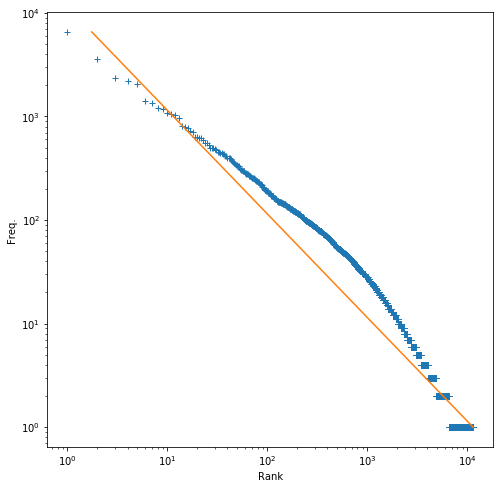

In [31]:
# plota a curva de rank-frequência para as palavras stemizadas

f, ax = plt.subplots(figsize=(8, 8))
ax.set(xscale="log", yscale="log")

plt.plot(rad_statistics['r'], rad_statistics['Freq'], linestyle='None', marker='+')
plt.plot(rad_statistics['bestc'], rad_statistics['Freq'], linestyle='-', marker='None')
plt.xlabel('Rank')
plt.ylabel('Freq.')
plt.show()

É possível observar que os dados não estão mais tão ajustados ao valor previsto pela Lei de Zipf. Isso pode acontecer por conta da redução do vocabulário, já que muitas palavras foram sumarizadas para os respectivos radicais. Além disso, palavras que apresentam frequência nem muito alta e nem muito baixa estão mais distantes da estimativa, demonstrando que essa classe possui maior frequência do que o esperado. 

### Plot dos bigramas

In [16]:
# produz bigramas e suas estatisticas

bigrams = nltk.bigrams(rad_list)
f_bigrams = nltk.FreqDist(bigrams)
total_bigrams_occurrences = sum(f_bigrams.values())

In [17]:
# construcao da tabela com as estastisticas dos bigramas

bigrams_statistics = pd.DataFrame()
bigrams_statistics['Bigram'] = list(f_bigrams.keys())
bigrams_statistics['Freq'] = list(f_bigrams.values())
bigrams_statistics['r'] = bigrams_statistics.Freq.rank(ascending=False, method='first')
bigrams_statistics['Pr(%)'] = (bigrams_statistics['Freq']/total_bigrams_occurrences) * 100
bigrams_statistics['r.Pr'] = bigrams_statistics['r'] * (bigrams_statistics['Pr(%)'] / 100)

bigrams_statistics.r = bigrams_statistics.r.astype(int)

bigrams_statistics.sort_values(by=['r'], ascending=True)[:10]

,Bigram,Freq,r,Pr(%),r.Pr
304,"(que, não)",287,1,0.184932,0.001849
998,"(que, est)",186,2,0.119852,0.002397
1406,"(com, uma)",147,3,0.094721,0.002842
137,"(diz, que)",129,4,0.083123,0.003325
2228,"(que, ele)",108,5,0.069591,0.003480
2191,"(par, que)",106,6,0.068302,0.004098
1066,"(uma, da)",103,7,0.066369,0.004646
2459,"(pod, ser)",101,8,0.065081,0.005206
264,"(afirm, que)",90,9,0.057993,0.005219
822,"(não, pod)",86,10,0.055415,0.005542


In [27]:
%%capture
# encontra o melhor parametro c para os bigramas

probs = bigrams_statistics['Pr(%)'] / 100
best_c = np.median(bigrams_statistics['r.Pr'])
bigrams_statistics['bestc'] = best_c / probs
best_c

In [33]:
    bigrams_statistics

,Bigram,Freq,r,Pr(%),r.Pr,bestc
0,"(juíz, feder)",2,7265,0.001289,0.093626,27091.000000
1,"(feder, ivan)",2,7266,0.001289,0.093639,27091.000000
2,"(ivan, silv)",2,7267,0.001289,0.093652,27091.000000
3,"(silv, luz)",4,2866,0.002577,0.073870,13545.500000
4,"(luz, brasíl)",1,17072,0.000644,0.110006,54182.000000
5,"(brasíl, proib)",1,17073,0.000644,0.110012,54182.000000
6,"(proib, carát)",1,17074,0.000644,0.110019,54182.000000
7,"(carát, limin)",1,17075,0.000644,0.110025,54182.000000
8,"(limin, nest)",1,17076,0.000644,0.110031,54182.000000
9,"(nest, sexta-f)",12,530,0.007732,0.040981,4515.166667


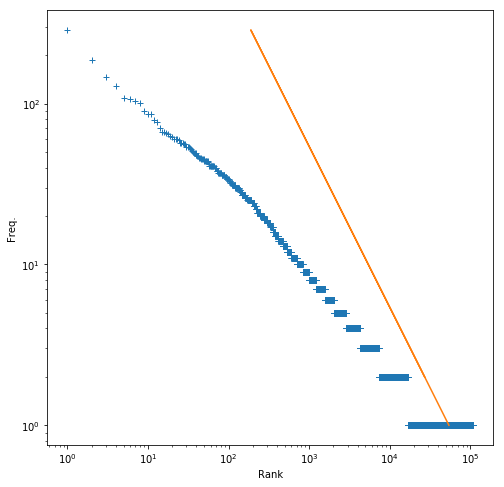

In [32]:
# plota a curva de rank-frequência para os bigramas

f, ax = plt.subplots(figsize=(8, 8))
ax.set(xscale="log", yscale="log")

plt.plot(bigrams_statistics['r'], bigrams_statistics['Freq'], linestyle='None', marker='+')
plt.plot(bigrams_statistics['bestc'], bigrams_statistics['Freq'], linestyle='-', marker='None')
plt.xlabel('Rank')
plt.ylabel('Freq.')
plt.show()

Notamos um total desajuste do que foi previsto com relação aos dados reais. Isso talvez ocorra por conta da estimativa mostrar que palavras com um ranking